In [1]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

In [2]:
# os.chdir(r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\with_Offset')
os.chdir(r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Raw_dataset')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv
# df.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)
df

,AP1RTT,AP1STDEV,AP1RSS,AP2RTT,AP2STDEV,AP2RSS,AP3RTT,AP3STDEV,AP3RSS,x,y,x1,y1,x2,y2,x3,y3
0,11.949,0.145,-59.0,5.998,0.150,-57,9.045,0.372,-63,1,1,7,9,7,0,0,9
1,11.462,0.407,-55.0,6.028,0.267,-56,9.006,0.425,-63,1,1,7,9,7,0,0,9
2,11.246,0.245,-61.0,6.311,0.630,-55,9.241,0.414,-63,1,1,7,9,7,0,0,9
3,10.309,0.864,-69.0,5.686,0.210,-56,9.748,1.739,-62,1,1,7,9,7,0,0,9
4,12.125,0.252,-64.0,6.077,0.105,-57,8.967,0.513,-65,1,1,7,9,7,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,1.227,0.181,-53.0,9.866,0.321,-69,5.647,1.047,-64,6,8,7,9,7,0,0,9
660,1.285,0.136,-53.0,10.022,0.226,-69,5.618,1.098,-64,6,8,7,9,7,0,0,9
661,1.188,0.150,-53.0,10.100,0.234,-68,5.676,1.021,-64,6,8,7,9,7,0,0,9
662,1.139,0.206,-53.0,10.139,0.158,-69,5.735,1.027,-64,6,8,7,9,7,0,0,9


In [3]:
df.drop(['AP1RSS','AP2RSS','AP3RSS','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)

In [4]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
#grouped = df.groupby(['x', 'y']).agg(['min'])

# Add the mean or average value of each column to the grouped dataframe
grouped = df.groupby(['x', 'y']).mean()
#grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
df = grouped.reset_index()
df

,x,y,A_P_1_R_T_T,A_P_1_S_T_D_E_V,A_P_2_R_T_T,A_P_2_S_T_D_E_V,A_P_3_R_T_T,A_P_3_S_T_D_E_V
0,1,1,10.178918,1.066333,5.965107,0.141504,9.408819,0.133744
1,1,2,10.418660,0.407708,7.160464,0.486028,9.887784,0.460747
2,1,3,9.312207,0.322244,9.164037,0.787931,7.157308,0.404662
3,1,7,5.741123,0.888978,9.734936,0.873201,1.912884,0.148901
4,1,8,7.183425,0.473028,11.232511,0.330619,0.476505,0.981901
5,2,1,11.408504,0.714262,5.881772,1.246364,8.554079,0.609167
6,2,2,9.316401,0.822399,5.554277,0.216622,9.118129,0.924308
7,2,3,9.202826,0.650289,5.802463,1.513773,7.514950,1.536497
8,2,7,6.341018,0.627516,7.910018,0.727868,2.725399,0.202878
9,2,8,8.434157,0.458550,9.463184,0.145792,1.790935,1.399032


In [5]:
new_name={
          'A_P_1_R_T_T':'AP1RTT_MEAN','A_P_2_R_T_T':'AP2RTT_MEAN','A_P_3_R_T_T':'AP3RTT_MEAN',
          'A_P_1_R_S_S':'AP1RSS_MEAN', 'A_P_2_R_S_S':'AP2RSS_MEAN', 'A_P_3_R_S_S':'AP3RSS_MEAN',
          'A_P_1_S_T_D_E_V':'AP1STDEV_MEAN','A_P_2_S_T_D_E_V':'AP2STDEV_MEAN','A_P_3_S_T_D_E_V':'AP3STDEV_MEAN'}
df.rename(columns=new_name,inplace=True)
df


,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1,1,10.178918,1.066333,5.965107,0.141504,9.408819,0.133744
1,1,2,10.418660,0.407708,7.160464,0.486028,9.887784,0.460747
2,1,3,9.312207,0.322244,9.164037,0.787931,7.157308,0.404662
3,1,7,5.741123,0.888978,9.734936,0.873201,1.912884,0.148901
4,1,8,7.183425,0.473028,11.232511,0.330619,0.476505,0.981901
5,2,1,11.408504,0.714262,5.881772,1.246364,8.554079,0.609167
6,2,2,9.316401,0.822399,5.554277,0.216622,9.118129,0.924308
7,2,3,9.202826,0.650289,5.802463,1.513773,7.514950,1.536497
8,2,7,6.341018,0.627516,7.910018,0.727868,2.725399,0.202878
9,2,8,8.434157,0.458550,9.463184,0.145792,1.790935,1.399032


In [6]:
input_data=df.iloc[:,2:] 
output_data = df.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [7]:
X=input_data
y=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 6)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 4, 'n_estimators': 50}
Mean Squared Error in meter: 2.353
Root Mean Squared Error (RMSE) on new data in meter: 1.534
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 29.571
R2 score is in percent: 38.83


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse)) 

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 1.84
Root Mean Squared Error (RMSE) on new data in m: 1.36
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 31.576
R2 score is in percent: 49.06


In [12]:
import tensorflow as tf
import keras
# Define the DNN model
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(112, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(112, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(48, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(2, activation='linear')
])

# Compile the model with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
dnn_model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mse'])





In [13]:

#best_model = tuner.get_best_models()[0]
from keras.callbacks import EarlyStopping

n_epochs=500
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = dnn_model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 19.9393 - mse: 19.9393 - val_loss: 24.1021 - val_mse: 24.1021
Epoch 2/500
1/1 [==============================] - 0s 24ms/step - loss: 19.4303 - mse: 19.4303 - val_loss: 23.3150 - val_mse: 23.3150
Epoch 3/500
1/1 [==============================] - 0s 18ms/step - loss: 18.9095 - mse: 18.9095 - val_loss: 22.5453 - val_mse: 22.5453
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 18.0096 - mse: 18.0096 - val_loss: 21.7461 - val_mse: 21.7461
Epoch 5/500
1/1 [==============================] - 0s 17ms/step - loss: 17.1754 - mse: 17.1754 - val_loss: 20.8657 - val_mse: 20.8657
Epoch 6/500
1/1 [==============================] - 0s 19ms/step - loss: 16.7794 - mse: 16.7794 - val_loss: 19.8890 - val_mse: 19.8890
Epoch 7/500
1/1 [==============================] - 0s 18ms/step - loss: 16.0314 - mse: 16.0314 - val_loss: 18.8387 - val_mse: 18.8387
Epoch 8/500
1/1 [==============================] - 0s 17ms/step 

In [14]:
# Evaluate the model on the test set
test_loss, test_mse = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 14ms/step - loss: 1.2615 - mse: 1.2615


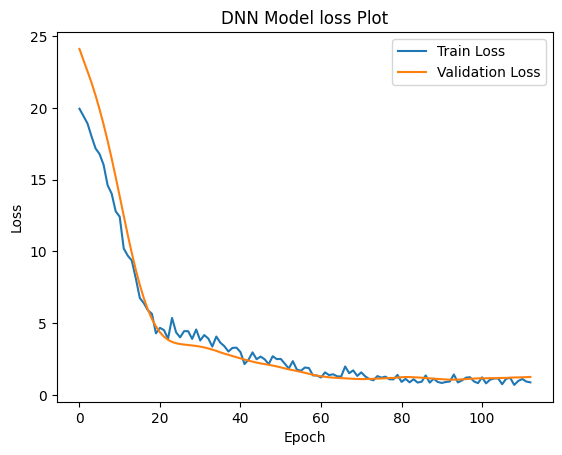

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [16]:
y_pred=dnn_model.predict(X_test)
y_pred

1/1 [==============================] - 0s 97ms/step


array([[5.840009 , 2.4064114],
       [5.090299 , 5.587532 ],
       [2.2530522, 7.0798664],
       [2.1282566, 1.7331555],
       [4.9402924, 6.767043 ],
       [5.6857505, 4.3310957],
       [2.3896315, 0.742551 ],
       [5.5916085, 5.23596  ],
       [5.777986 , 1.7879503],
       [3.560368 , 5.7456627],
       [1.0957918, 4.700316 ],
       [2.244735 , 6.139472 ]], dtype=float32)

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,y_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, y_pred)*100))

Mean Squared Error (MSE) on new data in m: 1.26
Root Mean Squared Error (RMSE) on new data in m: 1.12
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 24.29
R2 score is in percent: 67.04


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 100}
Mean Squared Error in meter: 0.177
Root Mean Squared Error (RMSE) on new data in meter: 0.421
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 9.347
R2 score is in percent: 95.36


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
import pandas as pd

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, RF_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, RF_pred) * 100
r2 = r2_score(y_test, RF_pred) * 100

# Store the results in a dictionary
results = {'n_estimators': [], 'max_depth': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': []}

# Loop over the different values of n_estimators and max_depth
for n in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        # Define the model with the current hyperparameters
        model = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=42)

        # Fit the model to the training data
        model.fit(y_pred, y_test)

        # Get the predictions using the trained model
        RF_pred = model.predict(y_pred)

        # Calculate the evaluation metrics
        mse = mean_squared_error(y_test, RF_pred)
        rmse = sqrt(mse)
        mape = mean_absolute_percentage_error(y_test, RF_pred) * 100
        r2 = r2_score(y_test, RF_pred) * 100

        # Store the results in the dictionary
        results['n_estimators'].append(n)
        results['max_depth'].append(depth)
        results['MSE'].append(mse)
        results['RMSE'].append(rmse)
        results['MAPE'].append(mape)
        results['R2'].append(r2)

# Print the results as a pandas dataframe
results_RF_df = pd.DataFrame(results)
print(results_RF_df)


Best Hyperparameters: {'max_depth': 6, 'n_estimators': 100}
    n_estimators  max_depth       MSE      RMSE       MAPE         R2
0             50          2  0.497837  0.705576  17.941007  86.424978
1             50          4  0.190501  0.436465   9.780316  95.014788
2             50          6  0.182117  0.426751   9.499405  95.198171
3             50          8  0.182117  0.426751   9.499405  95.198171
4            100          2  0.479810  0.692683  17.106862  87.013016
5            100          4  0.184958  0.430068   9.618142  95.178019
6            100          6  0.177292  0.421060   9.347371  95.358586
7            100          8  0.177292  0.421060   9.347371  95.358586
8            200          2  0.497971  0.705671  17.965664  86.461759
9            200          4  0.188225  0.433849  10.517405  95.042517
10           200          6  0.181880  0.426474  10.315774  95.198678
11           200          8  0.181880  0.426474  10.315774  95.198678


In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.53
Root Mean Squared Error (RMSE) on new data in m: 0.73
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 18.99
R2 score is in percent: 84.83


In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt
import pandas as pd

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics for the best K value
mse = mean_squared_error(y_test, knn_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, knn_pred) * 100
r2 = r2_score(y_test, knn_pred)

# Store the results in a dictionary
results = {'k': [grid_search.best_params_['n_neighbors']], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape], 'R2': [r2]}

# Loop over the different values of K
for k in param_grid['n_neighbors']:
    # Set the K parameter of the KNN model
    knn_model.set_params(n_neighbors=k)

    # Fit the KNN model to the training data
    knn_model.fit(y_pred, y_test)

    # Get the predictions using the trained KNN model
    knn_pred = knn_model.predict(y_pred)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test, knn_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, knn_pred) * 100
    r2 = r2_score(y_test, knn_pred)

    # Store the results in the dictionary
    results['k'].append(k)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['MAPE'].append(mape)
    results['R2'].append(r2)

# Print the results as a pandas dataframe
results_KNN_df = pd.DataFrame(results)
print(results_KNN_df)


Best K value found by grid search: 3
   k       MSE      RMSE       MAPE        R2
0  3  0.527778  0.726483  18.993056  0.848304
1  3  0.527778  0.726483  18.993056  0.848304
2  5  1.050000  1.024695  29.439484  0.703682
3  7  1.665816  1.290665  37.500709  0.491827
4  9  2.167695  1.472310  45.150463  0.378504


In [22]:
from tensorflow.keras.models import load_model

dnn_model.save('my_DNN_Regrr_model_xy_no_feature_extraction_without_offset.h5')


In [23]:
loaded_model = load_model('my_DNN_Regrr_model_xy_no_feature_extraction_without_offset.h5')
loaded_model

In [24]:
# dfff=pd.read_csv('D:/testt.csv')
#data_folder = r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Test_dataset\With_offset'
#data_folder = r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Test_dataset\Raw_testdata'

data_folder = r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Random_test_data\test'
os.chdir(data_folder)
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
dfff=combined_csv
# dfff = dfff.loc[:, ~df.columns.str.contains('^Unnamed')]

# # Drop rows with NaN values
# dfff.dropna(inplace=True)
# dfff.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)
dfff

,AP1RTT,AP1STDEV,AP1RSS,AP2RTT,AP2STDEV,AP2RSS,AP3RTT,AP3STDEV,AP3RSS,x,y,x1,y1,x2,y2,x3,y3
0,8.766,1.011,-58,5.500,2.452,-57,7.024,1.291,-61,1.5,2.0,7,9,7,0,0,9
1,9.283,0.798,-64,5.295,1.709,-61,9.631,0.566,-63,1.5,2.0,7,9,7,0,0,9
2,8.298,1.433,-59,5.530,0.398,-56,9.075,0.614,-63,1.5,2.0,7,9,7,0,0,9
3,9.049,0.869,-62,5.647,1.490,-58,6.965,1.516,-66,1.5,2.0,7,9,7,0,0,9
4,9.166,0.817,-62,5.559,1.690,-56,7.639,1.187,-68,1.5,2.0,7,9,7,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,8.102,1.245,-55,3.743,1.467,-55,8.079,0.505,-65,3.0,1.5,7,9,7,0,0,9
149,8.180,1.795,-55,4.036,1.129,-55,7.786,0.702,-70,3.0,1.5,7,9,7,0,0,9
150,7.789,1.614,-56,4.065,1.189,-55,8.196,0.850,-66,3.0,1.5,7,9,7,0,0,9
151,7.984,1.923,-55,3.831,1.267,-54,7.961,0.504,-65,3.0,1.5,7,9,7,0,0,9


In [25]:
dfff.drop(['AP1RSS','AP2RSS','AP3RSS','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)

In [26]:
# Add the mean or average value of each column to the grouped dataframe
grouped = dfff.groupby(['x', 'y']).mean()
#grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
dffff = grouped.reset_index()

In [27]:
new_name={
          'A_P_1_R_T_T':'AP1RTT_MEAN','A_P_2_R_T_T':'AP2RTT_MEAN','A_P_3_R_T_T':'AP3RTT_MEAN',
          'A_P_1_R_S_S':'AP1RSS_MEAN', 'A_P_2_R_S_S':'AP2RSS_MEAN', 'A_P_3_R_S_S':'AP3RSS_MEAN',
          'A_P_1_S_T_D_E_V':'AP1STDEV_MEAN','A_P_2_S_T_D_E_V':'AP2STDEV_MEAN','A_P_3_S_T_D_E_V':'AP3STDEV_MEAN'}
dffff.rename(columns=new_name,inplace=True)
dffff

,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1.0,2.5,9.810285,1.317460,7.526212,0.874270,6.628664,0.165723
1,1.5,2.0,9.177529,0.833757,5.427375,0.898500,7.358301,1.645309
2,1.5,7.5,5.829131,1.438594,8.640169,1.129444,2.152719,0.167319
3,2.0,2.5,8.691986,0.667889,5.401965,0.312556,7.354417,1.567792
4,2.5,2.5,8.495744,1.360250,4.368667,0.428071,9.096942,0.431333
5,2.5,7.5,5.655373,0.346784,8.686804,0.750458,2.002719,0.121922
6,3.0,1.5,8.119614,1.316752,4.000118,1.199183,8.735725,0.816902
7,3.0,5.5,6.139562,1.276392,6.485667,0.366248,4.284026,0.921190
8,3.0,7.5,4.391392,1.306385,7.872865,0.348223,2.758270,0.203047
9,3.5,3.5,5.960784,0.344486,5.223162,0.133959,7.322757,0.584236


In [28]:
input_data=dffff.iloc[:,2:] 
output_data = dffff.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

# input_data=dfff.iloc[:,:6] 
# output_data = dfff.iloc[:, 6:]
# input_data=np.array(input_data.values)
# output_data=np.array(output_data.values)
print(input_data)
print(output_data)

[[ 9.81028467  1.31745985  7.52621168  0.87427007  6.62866423  0.16572263]
 [ 9.17752941  0.83375735  5.427375    0.8985      7.35830147  1.64530882]
 [ 5.82913125  1.43859375  8.64016875  1.12944375  2.15271875  0.16731875]
 [ 8.69198611  0.66788889  5.40196528  0.31255556  7.35441667  1.56779167]
 [ 8.49574359  1.36025     4.36866667  0.42807051  9.09694231  0.43133333]
 [ 5.65537255  0.34678431  8.68680392  0.75045752  2.00271895  0.12192157]
 [ 8.11961438  1.31675163  4.00011765  1.19918301  8.73572549  0.81690196]
 [ 6.13956209  1.27639216  6.48566667  0.36624837  4.28402614  0.92118954]
 [ 4.39139189  1.30638514  7.87286486  0.34822297  2.75827027  0.2030473 ]
 [ 5.96078378  0.34448649  5.22316216  0.13395946  7.32275676  0.58423649]
 [ 5.49510811  0.566       4.98078378  0.50994595  6.59604054  0.38548649]
 [ 6.33767033  0.37431868  5.01628571  0.15535165  8.56247253  0.73954945]
 [ 6.567       0.98237162  3.60010135  0.27565541 10.59287838  0.88569595]
 [ 2.02862406  1.64694737

In [29]:
XX=input_data
yy=output_data
print(output_data.shape)
print(input_data.shape)

(18, 2)
(18, 6)


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XX= sc.fit_transform(XX)

In [31]:
y_predd=loaded_model.predict(XX)
y_predd

1/1 [==============================] - 0s 42ms/step


array([[0.64501226, 1.6392627 ],
       [2.751406  , 1.790041  ],
       [2.7552621 , 7.6225457 ],
       [3.779861  , 1.9913366 ],
       [3.1028485 , 0.7914629 ],
       [2.6820552 , 7.5194035 ],
       [4.0502725 , 1.0770326 ],
       [3.6303616 , 5.670656  ],
       [3.6753843 , 7.651742  ],
       [5.445013  , 3.6028478 ],
       [5.0569296 , 3.411958  ],
       [5.408131  , 2.905037  ],
       [5.5081034 , 1.7888675 ],
       [5.1881523 , 7.164653  ],
       [4.8367605 , 6.676159  ],
       [3.5939662 , 7.4049835 ],
       [5.196705  , 1.5095782 ],
       [4.8164573 , 3.6216686 ]], dtype=float32)

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(yy, y_predd)
print('Mean Squared Error (MSE) on new data in mm: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(yy, y_predd)) 
print('Root Mean Squared Error (RMSE) on new data in mm: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,y_predd)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, y_predd)*100))

Mean Squared Error (MSE) on new data in mm: 0.80
Root Mean Squared Error (RMSE) on new data in mm: 0.90
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 24.57
R2 score is in percent: 64.72


In [33]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(y_predd, columns=['predicted_x','predicted_y'])
df_finall_dnn = pd.DataFrame()
df_finall_dnn = pd.concat([y_predd, yy], axis=1)
df_finall_dnn

,predicted_x,predicted_y,x,y
0,0.645012,1.639263,1.0,2.5
1,2.751406,1.790041,1.5,2.0
2,2.755262,7.622546,1.5,7.5
3,3.779861,1.991337,2.0,2.5
4,3.102849,0.791463,2.5,2.5
5,2.682055,7.519403,2.5,7.5
6,4.050272,1.077033,3.0,1.5
7,3.630362,5.670656,3.0,5.5
8,3.675384,7.651742,3.0,7.5
9,5.445013,3.602848,3.5,3.5


In [34]:
XX=pd.DataFrame(XX,columns=['AP1','AP1STDV','AP2','AP2STDV','AP3','AP#STDV'])
df_finalll_dnn = pd.concat([y_predd, yy,XX], axis=1)
df_finalll_dnn

,predicted_x,predicted_y,x,y,AP1,AP1STDV,AP2,AP2STDV,AP3,AP#STDV
0,0.645012,1.639263,1.0,2.5,1.715442,0.919005,0.855114,0.533722,0.128844,-0.978759
1,2.751406,1.790041,1.5,2.0,1.397828,-0.157927,-0.226893,0.592187,0.421192,2.216613
2,2.755262,7.622546,1.5,7.5,-0.282913,1.188702,1.429389,1.149440,-1.664559,-0.975312
3,3.779861,1.991337,2.0,2.5,1.154108,-0.527222,-0.239992,-0.821660,0.419635,2.049204
4,3.102849,0.791463,2.5,2.5,1.055603,1.014274,-0.772685,-0.542930,1.117823,-0.405136
5,2.682055,7.519403,2.5,7.5,-0.370132,-1.242141,1.453431,0.234970,-1.724660,-1.073353
6,4.050272,1.077033,3.0,1.5,0.866804,0.917428,-0.962682,1.317717,0.973092,0.427553
7,3.630362,5.670656,3.0,5.5,-0.127091,0.827570,0.318685,-0.692103,-0.810596,0.652777
8,3.675384,7.651742,3.0,7.5,-1.004592,0.894348,1.033823,-0.735597,-1.421929,-0.898151
9,5.445013,3.602848,3.5,3.5,-0.216829,-1.247257,-0.332170,-1.252602,0.406950,-0.074920


In [58]:
df_finall_dnn.to_csv('output_data_dnn_randomtest_no_offset.csv', index=False)

In [36]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# from math import sqrt
# from sklearn.metrics import r2_score

# # Define the model
# model = RandomForestRegressor(random_state=42)

# # Define the hyperparameters to search over
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [2, 4, 6, 8]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(y_predd,yy)
# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Predict on new data with the best model
# best_model = grid_search.best_estimator_
# RF_pred = best_model.predict(y_predd)

# # Calculate the mean squared error
# mse = mean_squared_error(yy, RF_pred)
# print("Mean Squared Error in meter: {:.3f}" .format(mse))

# rmse=sqrt(mean_squared_error(yy, RF_pred)) 
# print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

# from sklearn.metrics import mean_absolute_percentage_error
# print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


# print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

In [37]:
best_model.fit(y_predd,yy)
RF_pred = best_model.predict(y_predd)

# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

Mean Squared Error in meter: 0.140
Root Mean Squared Error (RMSE) on new data in meter: 0.375
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 10.59
R2 score is in percent: 94.41


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Define the model with hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)

# Train the model on the training data
model.fit(y_predd,yy)

# Use the model to predict on the test data
RF_pred = model.predict(y_predd)


# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}".format(mse))

rmse = sqrt(mean_squared_error(yy, RF_pred))
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy, RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))


Mean Squared Error in meter: 0.140
Root Mean Squared Error (RMSE) on new data in meter: 0.375
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 10.59
R2 score is in percent: 94.41


In [39]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(RF_pred, columns=['predicted_x','predicted_y'])
df_finall = pd.DataFrame()
df_finall = pd.concat([y_predd, yy], axis=1)
df_finall

,predicted_x,predicted_y,x,y
0,1.510,2.340,1.0,2.5
1,2.000,2.200,1.5,2.0
2,2.025,7.445,1.5,7.5
3,2.360,2.250,2.0,2.5
4,2.405,2.380,2.5,2.5
5,2.585,7.445,2.5,7.5
6,3.000,1.845,3.0,1.5
7,3.440,5.715,3.0,5.5
8,2.950,7.365,3.0,7.5
9,3.835,3.515,3.5,3.5


In [59]:
# df_finall.to_csv('output_data_randomtest_no_offset.csv', index=False)

In [41]:
best_knn_model.fit(y_predd, yy)
knn_pred = best_knn_model.predict(y_predd)

# Calculate the evaluation metrics
mse = mean_squared_error(yy, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(yy, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

Mean Squared Error (MSE) on new data in m: 0.29
Root Mean Squared Error (RMSE) on new data in m: 0.54
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 15.12
R2 score is in percent: 89.99


In [42]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for the grid search
# param_grid = {'n_neighbors': [3,5,7,9]}

# # Create a KNN model
# knn_model = KNeighborsRegressor()

# # Perform a grid search using cross-validation
# grid_search = GridSearchCV(knn_model, param_grid, cv=5)
# grid_search.fit(y_predd, yy)

# # Print the best parameter value found by the grid search
# print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# # Get the predictions using the best K value
# best_knn_model = grid_search.best_estimator_
# knn_pred = best_knn_model.predict(y_predd)

# # Calculate the evaluation metrics
# mse = mean_squared_error(yy, knn_pred)
# print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
# rmse=sqrt(mean_squared_error(yy, knn_pred)) 
# print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

# from sklearn.metrics import mean_absolute_percentage_error
# print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

# print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

In [43]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(knn_pred, columns=['predicted_x','predicted_y'])
df_finall_KNN = pd.DataFrame()
df_finall_KNN = pd.concat([y_predd, yy], axis=1)
df_finall_KNN

,predicted_x,predicted_y,x,y
0,1.500000,2.333333,1.0,2.5
1,2.000000,2.333333,1.5,2.0
2,2.333333,7.500000,1.5,7.5
3,2.000000,2.333333,2.0,2.5
4,2.000000,2.333333,2.5,2.5
5,2.333333,7.500000,2.5,7.5
6,2.500000,2.166667,3.0,1.5
7,3.833333,5.166667,3.0,5.5
8,2.333333,7.500000,3.0,7.5
9,3.666667,3.833333,3.5,3.5


In [60]:
# df_finall_KNN.to_csv('output_data__KNN_randomtest_no_offset.csv', index=False)

In [45]:
df_finalll_dnn.head()

,predicted_x,predicted_y,x,y,AP1,AP1STDV,AP2,AP2STDV,AP3,AP#STDV
0,0.645012,1.639263,1.0,2.5,1.715442,0.919005,0.855114,0.533722,0.128844,-0.978759
1,2.751406,1.790041,1.5,2.0,1.397828,-0.157927,-0.226893,0.592187,0.421192,2.216613
2,2.755262,7.622546,1.5,7.5,-0.282913,1.188702,1.429389,1.149440,-1.664559,-0.975312
3,3.779861,1.991337,2.0,2.5,1.154108,-0.527222,-0.239992,-0.821660,0.419635,2.049204
4,3.102849,0.791463,2.5,2.5,1.055603,1.014274,-0.772685,-0.542930,1.117823,-0.405136


In [46]:
df.head()

,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1,1,10.178918,1.066333,5.965107,0.141504,9.408819,0.133744
1,1,2,10.418660,0.407708,7.160464,0.486028,9.887784,0.460747
2,1,3,9.312207,0.322244,9.164037,0.787931,7.157308,0.404662
3,1,7,5.741123,0.888978,9.734936,0.873201,1.912884,0.148901
4,1,8,7.183425,0.473028,11.232511,0.330619,0.476505,0.981901


In [47]:
results_KNN_df

,k,MSE,RMSE,MAPE,R2
0,3,0.527778,0.726483,18.993056,0.848304
1,3,0.527778,0.726483,18.993056,0.848304
2,5,1.050000,1.024695,29.439484,0.703682
3,7,1.665816,1.290665,37.500709,0.491827
4,9,2.167695,1.472310,45.150463,0.378504


In [48]:
results_RF_df

,n_estimators,max_depth,MSE,RMSE,MAPE,R2
0,50,2,0.497837,0.705576,17.941007,86.424978
1,50,4,0.190501,0.436465,9.780316,95.014788
2,50,6,0.182117,0.426751,9.499405,95.198171
3,50,8,0.182117,0.426751,9.499405,95.198171
4,100,2,0.479810,0.692683,17.106862,87.013016
5,100,4,0.184958,0.430068,9.618142,95.178019
6,100,6,0.177292,0.421060,9.347371,95.358586
7,100,8,0.177292,0.421060,9.347371,95.358586
8,200,2,0.497971,0.705671,17.965664,86.461759
9,200,4,0.188225,0.433849,10.517405,95.042517


In [49]:
results_KNN_df

,k,MSE,RMSE,MAPE,R2
0,3,0.527778,0.726483,18.993056,0.848304
1,3,0.527778,0.726483,18.993056,0.848304
2,5,1.050000,1.024695,29.439484,0.703682
3,7,1.665816,1.290665,37.500709,0.491827
4,9,2.167695,1.472310,45.150463,0.378504


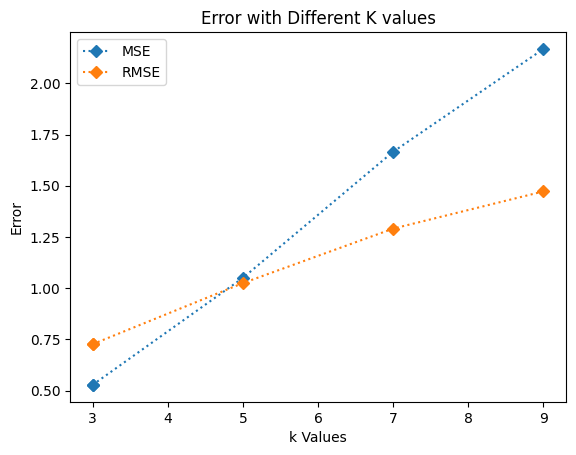

In [50]:
import matplotlib.pyplot as plt

# Select the columns to plot
df_plot = results_KNN_df[['k', 'MSE', 'RMSE']]

# Set the index to be the 'k' column
df_plot = df_plot.set_index('k')

# Plot the data
df_plot.plot(kind='line', linestyle='dotted', marker='D')

# Set the x-axis label
plt.xlabel('k Values')

# Set the y-axis label
plt.ylabel('Error')
plt.title('Error with Different K values')
# Show the plot
plt.show()


<Figure size 2000x1600 with 0 Axes>

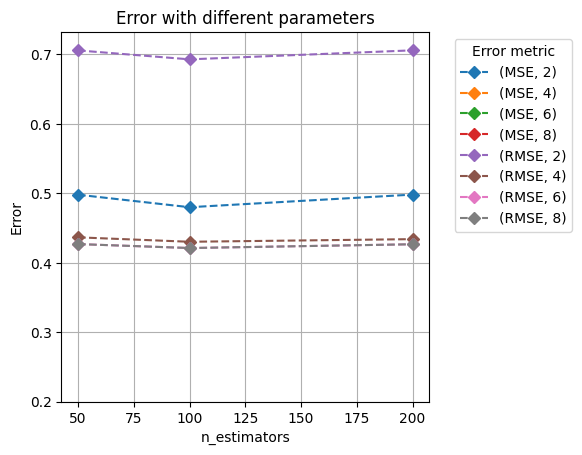

In [51]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 16))

# Select the columns to plot
df_plot = results_RF_df[['n_estimators', 'max_depth', 'MSE', 'RMSE']]

# Pivot the max_depth level to columns
df_plot = df_plot.set_index(['n_estimators','max_depth'])[['MSE', 'RMSE']].unstack() #unstack() method to reshape the dataframe so that it can be plotted more easily.  unstack() method to pivot the max_depth level to columns.

# Plot the data
df_plot.plot(kind='line', marker='D', linestyle='--')

# Set the x-axis label
plt.xlabel('n_estimators')

# Set the y-axis label
plt.ylabel('Error')
plt.grid()

# Set the legend title
legend = plt.legend(title='Error metric', loc='best', bbox_to_anchor=(1.05, 1))

# Set the legend outside of the plot
plt.subplots_adjust(right=0.7)
# Set the y-axis limits
plt.ylim(0.2)
plt.title('Error with different parameters')
# Show the plot
plt.show()


In [52]:
df_finall

,predicted_x,predicted_y,x,y
0,1.510,2.340,1.0,2.5
1,2.000,2.200,1.5,2.0
2,2.025,7.445,1.5,7.5
3,2.360,2.250,2.0,2.5
4,2.405,2.380,2.5,2.5
5,2.585,7.445,2.5,7.5
6,3.000,1.845,3.0,1.5
7,3.440,5.715,3.0,5.5
8,2.950,7.365,3.0,7.5
9,3.835,3.515,3.5,3.5


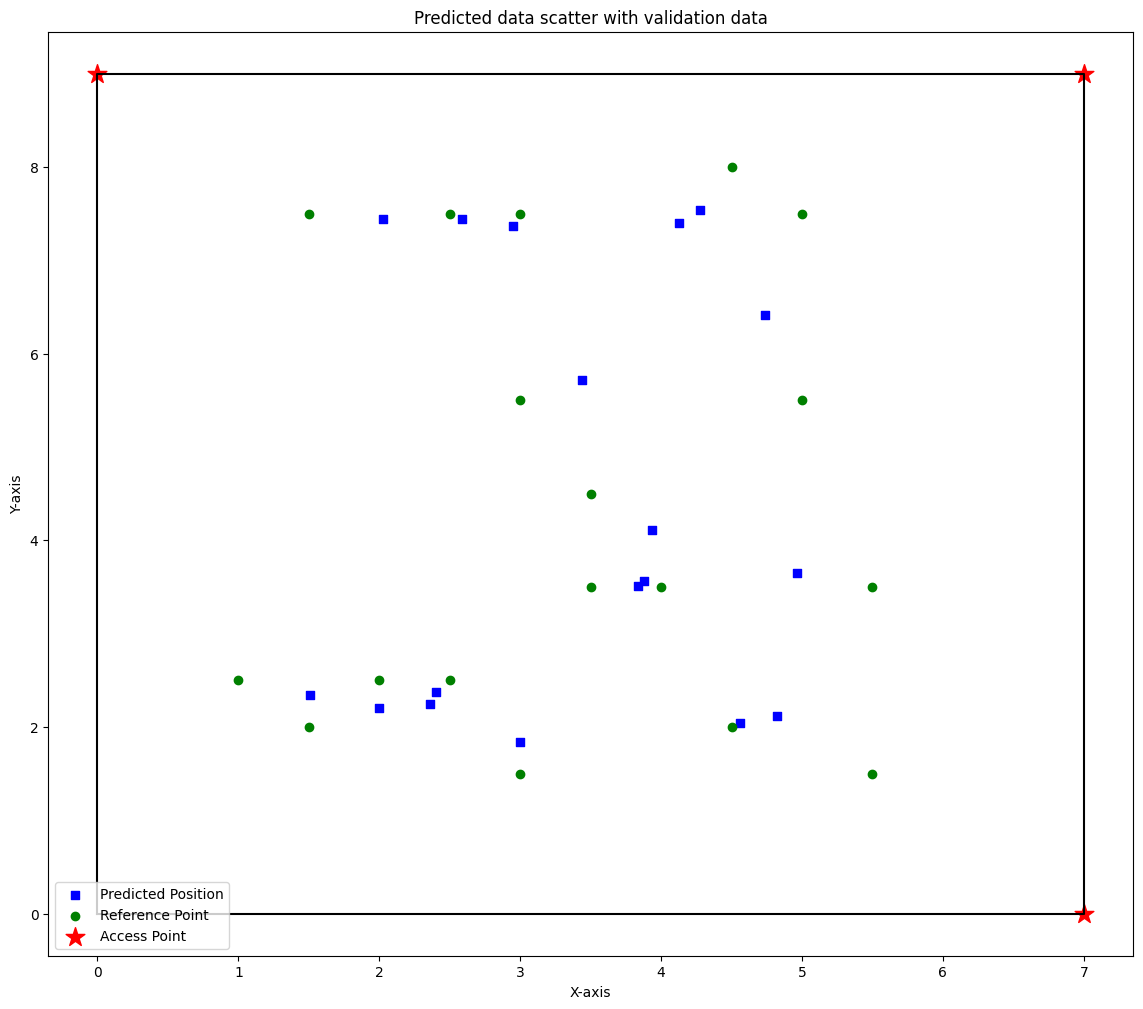

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))

# Set up the room coordinates
x = [0, 7, 7, 0, 0]
y = [0, 0, 9, 9, 0]

# Plot the room as a polygon
plt.plot(x, y, color='black')

plt.scatter(df_finall['predicted_x'], df_finall['predicted_y'], color='blue', marker='s', label='Predicted Position')
plt.scatter(df_finall['x'], df_finall['y'], color='green', label='Reference Point')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Predicted data scatter with validation data')
plt.legend(loc='best')

# Highlight specific points with a red star symbol
plt.scatter(7, 0, marker='*', color='red', s=200, label='Access Point')
plt.scatter(0, 9, marker='*', color='red', s=200)
plt.scatter(7, 9, marker='*', color='red', s=200)

plt.legend(loc='lower left')

plt.show()


In [54]:
df_finall['errorx']=df_finall['predicted_x']-df_finall['x']

In [55]:
df_finall['errory']=df_finall['predicted_y']-df_finall['y']
df_finall

,predicted_x,predicted_y,x,y,errorx,errory
0,1.510,2.340,1.0,2.5,0.510,-0.160
1,2.000,2.200,1.5,2.0,0.500,0.200
2,2.025,7.445,1.5,7.5,0.525,-0.055
3,2.360,2.250,2.0,2.5,0.360,-0.250
4,2.405,2.380,2.5,2.5,-0.095,-0.120
5,2.585,7.445,2.5,7.5,0.085,-0.055
6,3.000,1.845,3.0,1.5,0.000,0.345
7,3.440,5.715,3.0,5.5,0.440,0.215
8,2.950,7.365,3.0,7.5,-0.050,-0.135
9,3.835,3.515,3.5,3.5,0.335,0.015


In [56]:
df_finall['abs_error']= df_finall['errorx']+df_finall['errory']

In [57]:
df_finall

,predicted_x,predicted_y,x,y,errorx,errory,abs_error
0,1.510,2.340,1.0,2.5,0.510,-0.160,0.350
1,2.000,2.200,1.5,2.0,0.500,0.200,0.700
2,2.025,7.445,1.5,7.5,0.525,-0.055,0.470
3,2.360,2.250,2.0,2.5,0.360,-0.250,0.110
4,2.405,2.380,2.5,2.5,-0.095,-0.120,-0.215
5,2.585,7.445,2.5,7.5,0.085,-0.055,0.030
6,3.000,1.845,3.0,1.5,0.000,0.345,0.345
7,3.440,5.715,3.0,5.5,0.440,0.215,0.655
8,2.950,7.365,3.0,7.5,-0.050,-0.135,-0.185
9,3.835,3.515,3.5,3.5,0.335,0.015,0.350
